<a href="https://colab.research.google.com/github/ResByte/2014/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# # to install pytorch uncomment these line 
!pip3 install torch torchvision
!pip3 install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


# Regression 
In this post, we are going to look at an overview of Machine learning foundations. Namely, regression and classification techniques. 



In this type of problem, we are given with a set of inputs and corresponding outputs. Our task is to estimate a output corresponding to new input. 

One of the simplest methods for regression is Ordinary Least Squares, here the equation is often modelled as :  $y_i = h_{\mathbf{w}}(\mathbf{x_i}) = \mathbf{ x_i^T w}$  . This is for each of $i$th data sample, and for $n$ samples it can be converted into $\mathbf{y = X w}$ . Here, $\mathbf{X} \in \mathbb{R}^{n \times d}$ and $\mathbf{w} \in \mathbb{R}^{d \times 1}$ resulting in $\mathbf{y} \in \mathbb{R}^{n \times 1}$. 


## Ordinary Least Square 
However, we do not know the values of $\mathbf{w}$ to estimate a new $y_j$. Hence, we need an approach to learn the parameters $\mathbf{w}^* = \arg \min_W $



However, there is no exact solution to this equation but we can find an approximate solution by minimizing the sum of squared error as : 
$$L(\mathbf{w}) = \sum_{i=1}^n (\mathbf{x}_i^T \mathbf{w} - y_i)^2 = \min_{\mathbf{w}}|| \mathbf{Xw} - y||_2^2$$ 
with estimated weights as $\mathbf{w}^*_{OLS}$ 

This can solved as :
$$
L(\mathbf{w}) = (\mathbf{X}\mathbf{w} - \mathbf{y})^T(\mathbf{X}\mathbf{w} - \mathbf{y}) \\
L(\mathbf{w}) = \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w} - 2 \mathbf{w}^T\mathbf{X}^Ty + \mathbf{y}^T\mathbf{y} \\
\nabla L(\mathbf{w}) =\nabla( \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w} - 2 \mathbf{w}^T\mathbf{X}^Ty + \mathbf{y}^T\mathbf{y}) \\
\nabla L(\mathbf{w}) = 2 \mathbf{X}^T \mathbf{X}\mathbf{w} - 2\mathbf{X}^T \mathbf{y}  \\
\mathbf{w}^*_{\text{ols}} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T y
$$


In [0]:
import torch 
import torch.nn as nn 
import numpy as np 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
%matplotlib inline 

In [14]:
# to repeat the experiments
torch.manual_seed(123)

In [0]:
# linear spaced dataset : start, end, steps=100
X = torch.linspace(-1, 1, 101)
y = 2 * X + torch.randn(X.size()) * 0.33 # y = 2x + eps(0, sigma)

In [0]:
def plot_data(data_x, data_y):
    data_x = data_x.numpy()
    data_y = data_y.numpy()
    f, ax = plt.subplots(figsize=(12, 8))
    plt.plot(data_x, data_y,'o', alpha=0.75)
    plt.xlabel("X")
    plt.ylabel("y")

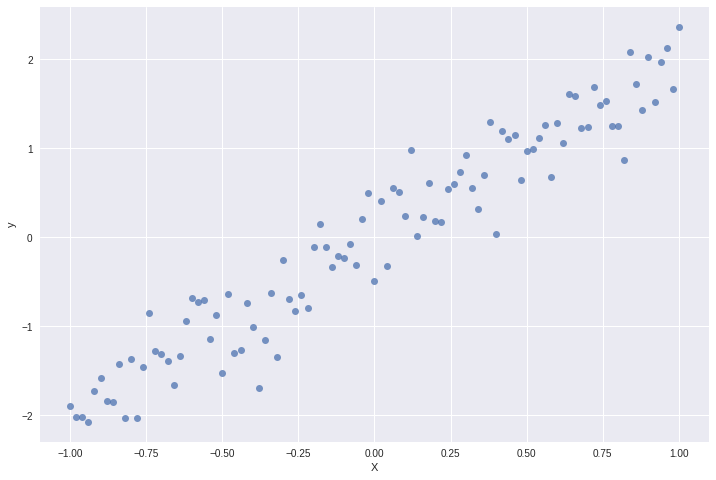

In [12]:
plot_data(X, y)

In [0]:
# build regression model 
# f(x) = mx + c
reg_model = nn.Sequential(
            nn.Linear(1, 1, bias=True)
            )
    

In [0]:
# fit the model 

# loss function is Mean Squared Error
loss = torch.nn.MSELoss(reduction='elementwise_mean')

# gradient descent based optimization 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)



In [0]:
batch_size = 10
epochs = 10

In [16]:
# training loop 
for epoch in range(epochs):
    cost = 0.
    num_batches = len(X) // batch_size 
    for k in range(num_batches):
        # load batch from X, y
        start, end = k * batch_size, (k + 1) * batch_size
        batch_x = X[start:end].view(batch_size, 1)
        batch_y = y[start:end].view(batch_size, 1)
        
        # start with forward pass 
        preds = reg_model(batch_x)
        
        # compute mse loss 
        batch_loss = loss(preds, batch_y)
        
        # update the parameter
        # Reset gradient
        optimizer.zero_grad()
        # compute gradients for the graph 
        batch_loss.backward()
        # update parameters
        optimizer.step()
        cost += batch_loss.item()
    print("Epoch = %d, cost = %s" % (epoch + 1, cost / num_batches))

Epoch = 1, cost = 1.4153896935284138
Epoch = 2, cost = 0.44998225271701814
Epoch = 3, cost = 0.12958984337747098
Epoch = 4, cost = 0.11636050827801228
Epoch = 5, cost = 0.11272614896297455
Epoch = 6, cost = 0.1097826600074768
Epoch = 7, cost = 0.10723004825413227
Epoch = 8, cost = 0.10532307103276253
Epoch = 9, cost = 0.10538104921579361
Epoch = 10, cost = 0.10550721399486065


In [17]:
w = next(reg_model.parameters()).data
print("w = %.2f" % w.numpy())

w = 1.96


## Ridge Regression

There are limitations on using OLS solutions for regression : 

- numerical instability :  features of data are close to collinear, this leads to linearly dependent features columns, this makes $\mathbf{X}$ to lose rank and has singular values close to 0 which makes inverse hard to compute  
- generalization issues

Simple solution to this to penalize the loss  :
$$L(\mathbf{w}) =  \min_{\mathbf{w}} || \mathbf{X}w - y ||^2_2 + \lambda ||\mathbf{w}||_2^2$$
$$L(\mathbf{w}) = \mathbf{w}^T \mathbf{X}^T \mathbf{X} \mathbf{w} - 2 \mathbf{w}^T\mathbf{X}^Ty + \mathbf{y}^T\mathbf{y} + \lambda \mathbf{w}^T\mathbf{w}$$
$$\{ \nabla L(\mathbf{w}) = 2 \mathbf{X}^T \mathbf{X}\mathbf{w} - 2\mathbf{X}^T \mathbf{y} + 2\lambda\mathbf{w} \}\to 0$$
$$2 \mathbf{X}^T \mathbf{X}\mathbf{w} - 2\mathbf{X}^T \mathbf{y} + 2\lambda\mathbf{w} = 0$$